In [1]:
#importing the neccessary libray
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


C:\Users\bhuma\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load breast cancer dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

In [3]:
df = data.frame

In [4]:
df.head

<bound method NDFrame.head of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean conca

In [5]:
df.shape

(569, 31)

In [6]:
df.describe

<bound method NDFrame.describe of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean c

In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

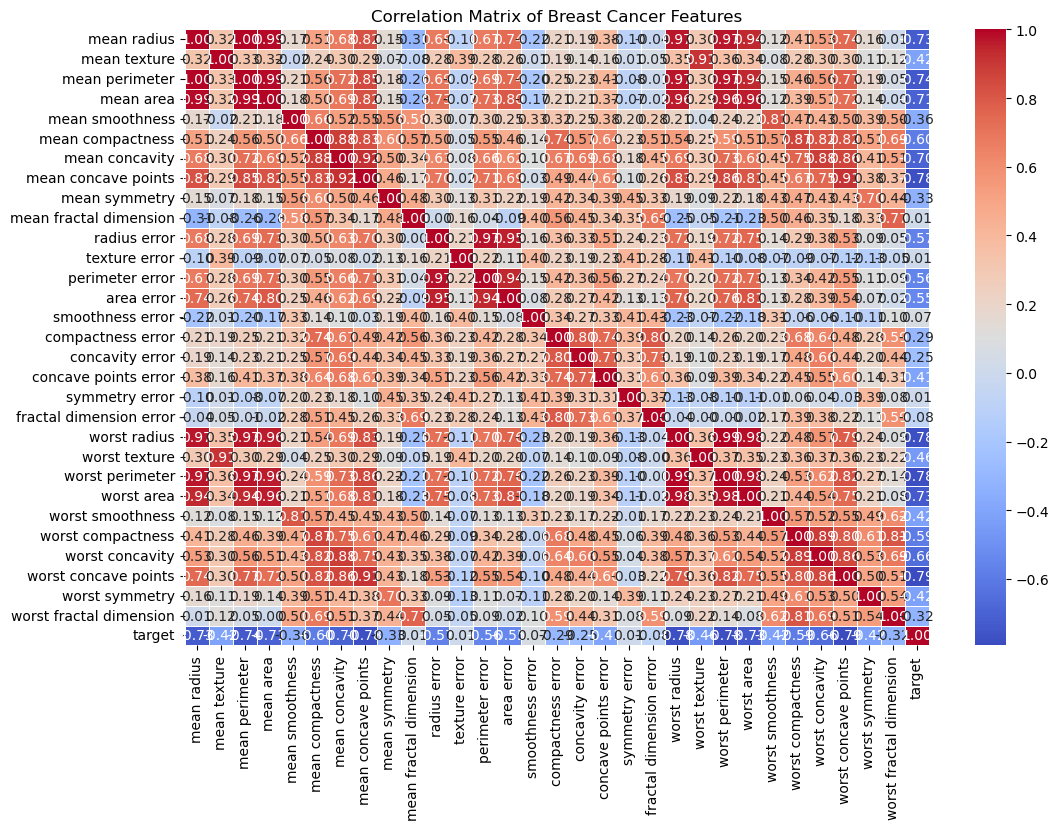

In [8]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Breast Cancer Features')
plt.show()


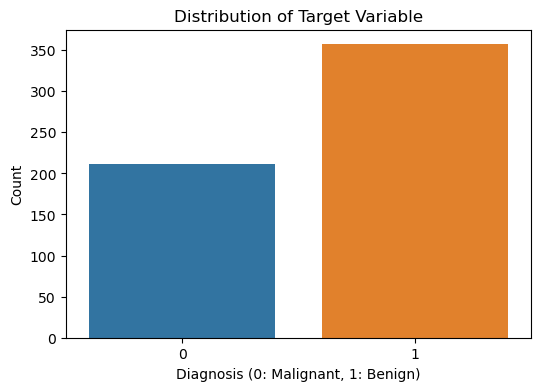

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

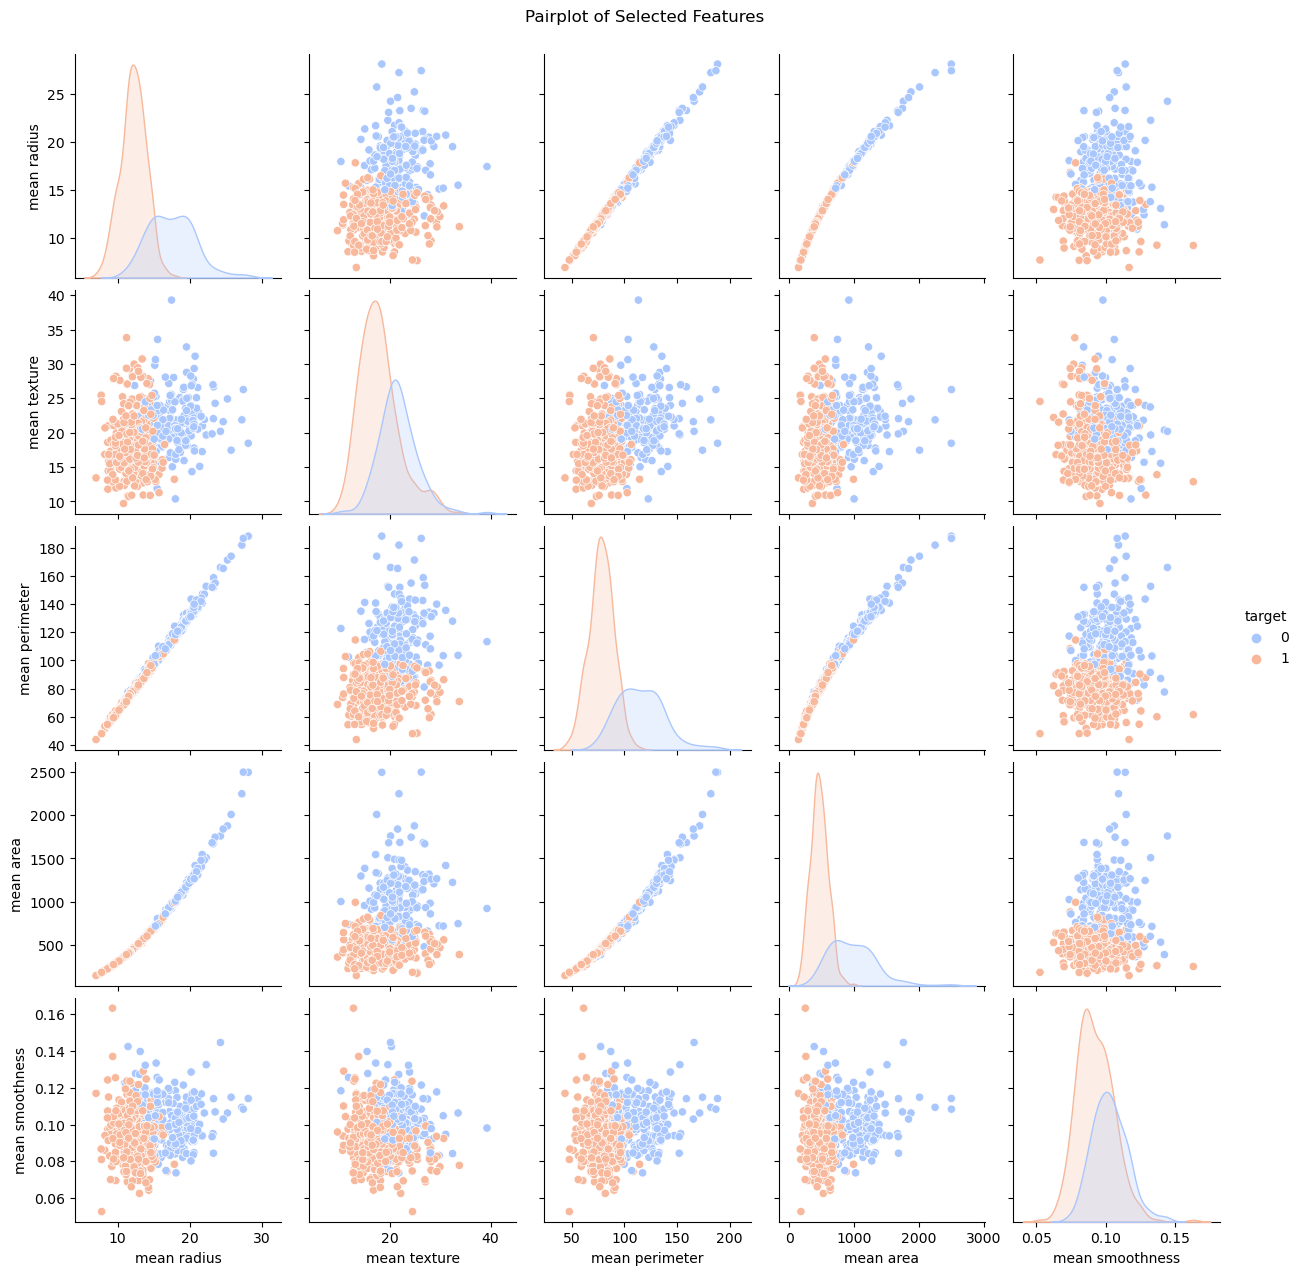

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


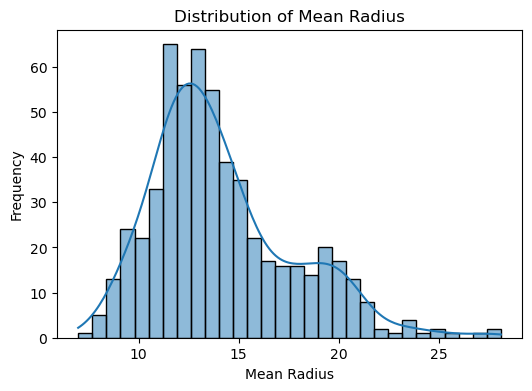

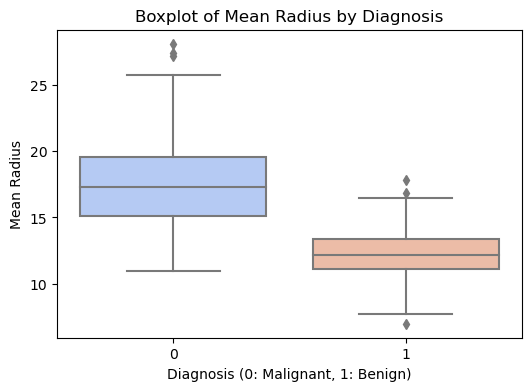

In [9]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Diagnosis (0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.show()

# Select a few features for pairplot to avoid clutter
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']
df_selected = df[selected_features]

# Plot pairplot
sns.pairplot(df_selected, hue='target', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Plot the distribution of the 'mean radius' feature
plt.figure(figsize=(6, 4))
sns.histplot(df['mean radius'], kde=True, bins=30)
plt.title('Distribution of Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.show()

# Plot boxplot of 'mean radius' grouped by target
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='mean radius', data=df, palette='coolwarm')
plt.title('Boxplot of Mean Radius by Diagnosis')
plt.xlabel('Diagnosis (0: Malignant, 1: Benign)')
plt.ylabel('Mean Radius')
plt.show()



In [10]:
# Features (all columns except 'target')
X = df.drop(columns=['target'])

# Target (the 'target' column)
y = df['target']


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:

# Initialize models
logistic_reg_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
svm_model = SVC(probability=True)

In [14]:
# Train Logistic Regression model
logistic_reg_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [15]:
# Train Decision Tree model
decision_tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [16]:
# Train Random Forest model
random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [17]:
# Train Support Vector Machine (SVM) model
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [18]:
# Make predictions
logistic_reg_pred = logistic_reg_model.predict(X_test_scaled)



In [19]:
decision_tree_pred = decision_tree_model.predict(X_test_scaled)
random_forest_pred = random_forest_model.predict(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)

In [20]:
# Predict probabilities for ROC-AUC
logistic_reg_proba = logistic_reg_model.predict_proba(X_test_scaled)[:, 1]
decision_tree_proba = decision_tree_model.predict_proba(X_test_scaled)[:, 1]
random_forest_proba = random_forest_model.predict_proba(X_test_scaled)[:, 1]
svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]


In [21]:
# Evaluate models
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_proba)
    return accuracy, precision, recall, f1, auc_roc



In [22]:
logistic_reg_eval = evaluate_model(y_test, logistic_reg_pred, logistic_reg_proba)
decision_tree_eval = evaluate_model(y_test, decision_tree_pred, decision_tree_proba)
random_forest_eval = evaluate_model(y_test, random_forest_pred, random_forest_proba)
svm_eval = evaluate_model(y_test, svm_pred, svm_proba)

# Print evaluation metrics
print("Logistic Regression:")
print("Accuracy:", logistic_reg_eval[0])
print("Precision:", logistic_reg_eval[1])
print("Recall:", logistic_reg_eval[2])
print("F1 Score:", logistic_reg_eval[3])
print("AUC-ROC Score:", logistic_reg_eval[4])
print()


Logistic Regression:
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.979020979020979
AUC-ROC Score: 0.99737962659679



In [23]:
print("Decision Trees:")
print("Accuracy:", decision_tree_eval[0])
print("Precision:", decision_tree_eval[1])
print("Recall:", decision_tree_eval[2])
print("F1 Score:", decision_tree_eval[3])
print("AUC-ROC Score:", decision_tree_eval[4])
print()


Decision Trees:
Accuracy: 0.9298245614035088
Precision: 0.9436619718309859
Recall: 0.9436619718309859
F1 Score: 0.9436619718309859
AUC-ROC Score: 0.9253193580085163



In [24]:
print("Random Forests:")
print("Accuracy:", random_forest_eval[0])
print("Precision:", random_forest_eval[1])
print("Recall:", random_forest_eval[2])
print("F1 Score:", random_forest_eval[3])
print("AUC-ROC Score:", random_forest_eval[4])
print()


Random Forests:
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222
AUC-ROC Score: 0.996069439895185



In [25]:
print("Support Vector Machines (SVM):")
print("Accuracy:", svm_eval[0])
print("Precision:", svm_eval[1])
print("Recall:", svm_eval[2])
print("F1 Score:", svm_eval[3])
print("AUC-ROC Score:", svm_eval[4])


Support Vector Machines (SVM):
Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0
F1 Score: 0.9861111111111112
AUC-ROC Score: 0.99737962659679


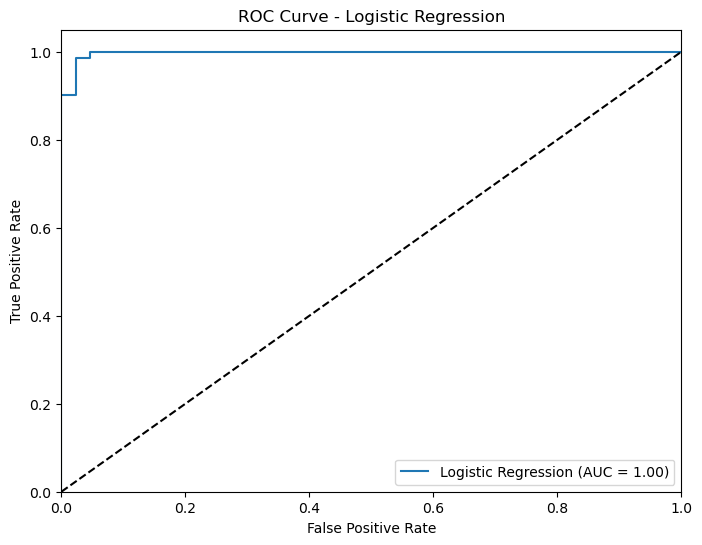

In [26]:

from sklearn.metrics import roc_curve
# Plotting ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, logistic_reg_proba)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {logistic_reg_eval[4]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


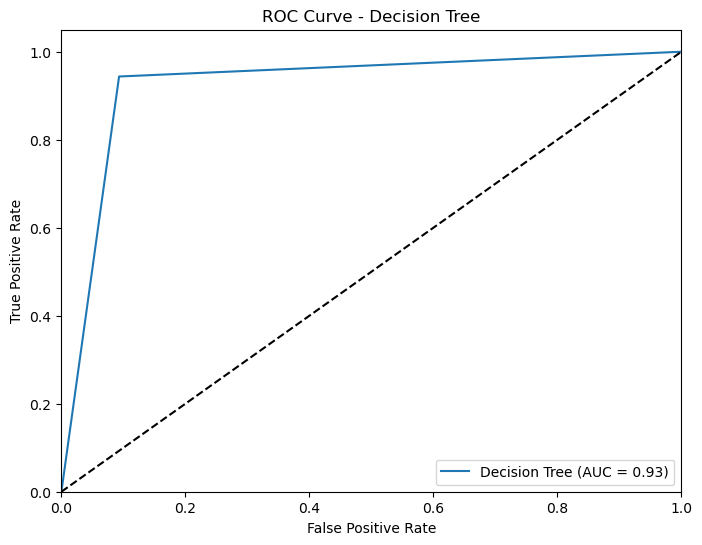

In [27]:
# Plotting ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, decision_tree_proba)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {decision_tree_eval[4]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

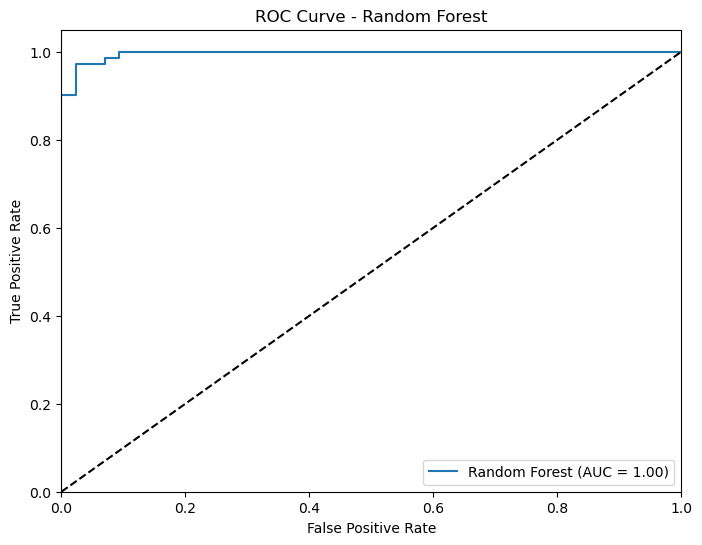

In [28]:
# Plotting ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, random_forest_proba)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {random_forest_eval[4]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

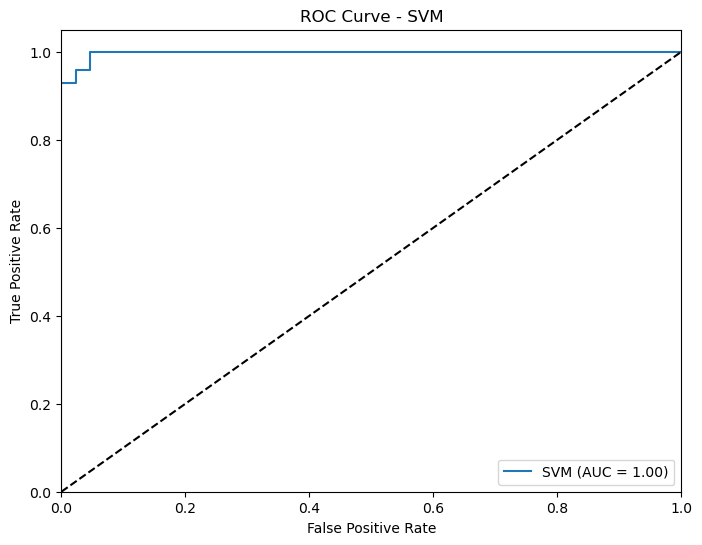

In [29]:
# Plotting ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, svm_proba)
plt.plot(fpr, tpr, label=f'SVM (AUC = {svm_eval[4]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()

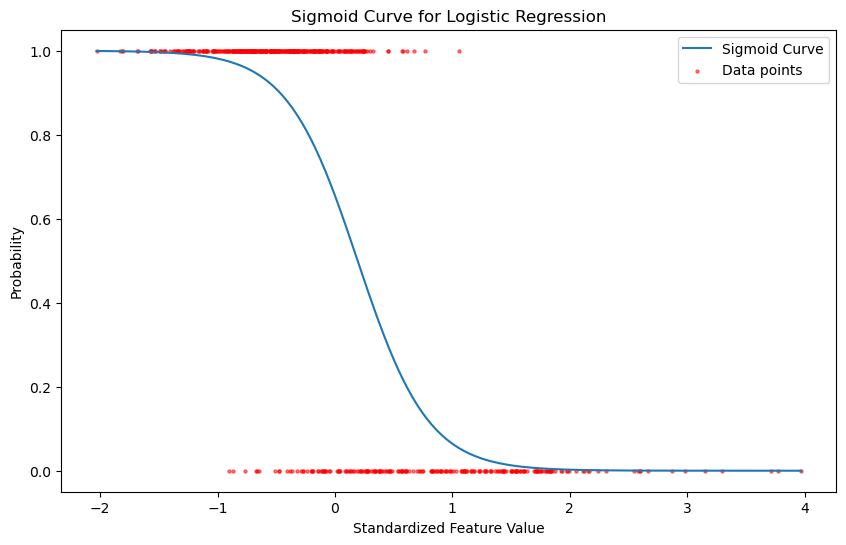

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Choose a single feature (for simplicity)
X = X[:, 0].reshape(-1, 1)  # Using the first feature

# Standardize the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Logistic Regression model
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_scaled, y)

# Extract coefficients
beta_0 = logistic_reg_model.intercept_[0]
beta_1 = logistic_reg_model.coef_[0][0]

# Generate a range of values for the input feature
X_range = np.linspace(X_scaled.min(), X_scaled.max(), 300)

# Calculate the predicted probabilities using the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate z for the range of values
z = beta_0 + beta_1 * X_range

# Calculate probabilities
probabilities = sigmoid(z)

# Plot the sigmoid curve
plt.figure(figsize=(10, 6))
plt.plot(X_range, probabilities, label='Sigmoid Curve')
plt.scatter(X_scaled, y, color='red', s=5, alpha=0.5, label='Data points')
plt.xlabel('Standardized Feature Value')
plt.ylabel('Probability')
plt.title('Sigmoid Curve for Logistic Regression')
plt.legend()
plt.show()


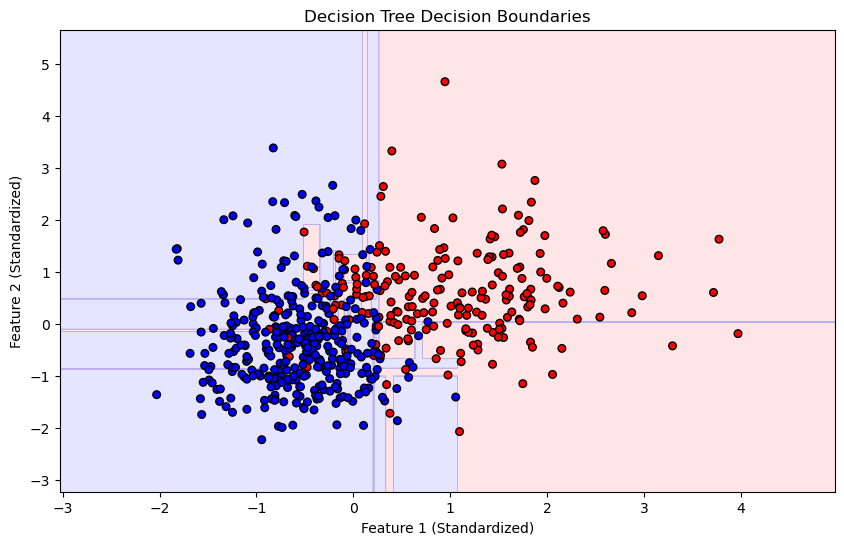

In [31]:
import numpy as np
from matplotlib.colors import ListedColormap

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Using the first two features for visualization
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_scaled, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=30, edgecolor='k', cmap=ListedColormap(cmap_bold))

plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('Decision Tree Decision Boundaries')
plt.show()


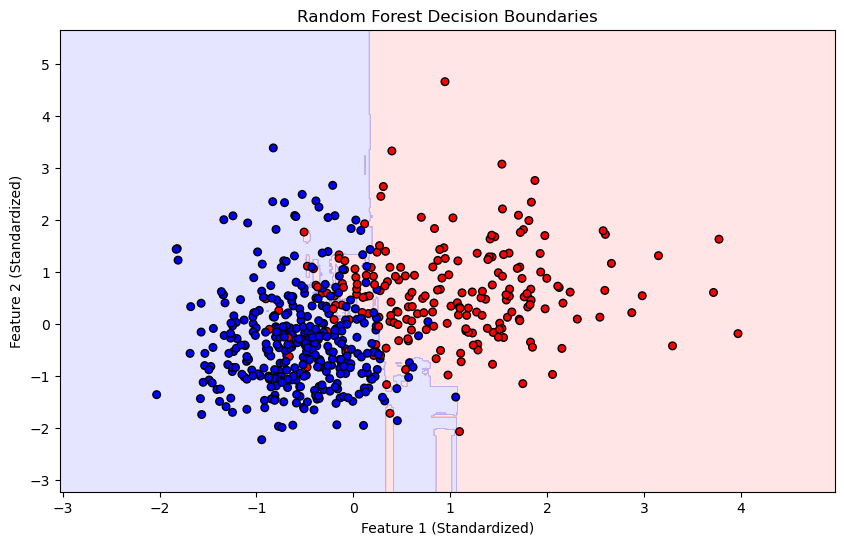

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Using the first two features for visualization
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_scaled, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = random_forest_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=30, edgecolor='k', cmap=ListedColormap(cmap_bold))

plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('Random Forest Decision Boundaries')
plt.show()


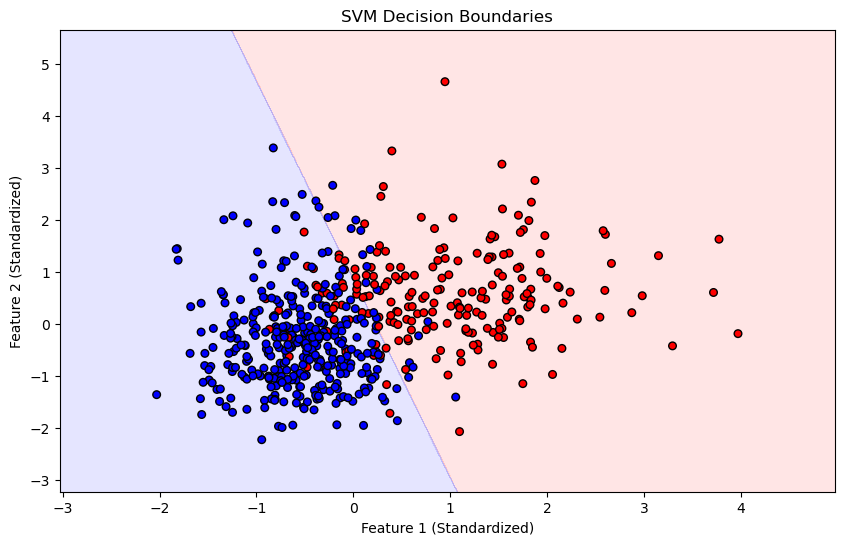

In [33]:

# Train SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_scaled, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=30, edgecolor='k', cmap=ListedColormap(cmap_bold))

plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('SVM Decision Boundaries')
plt.show()


In [34]:
model = LogisticRegression()

In [35]:
# training the Logistic Regression model using Training data

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

C:\Users\bhuma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [37]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

C:\Users\bhuma\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [38]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Beinging')



[0]
The Breast cancer is Malignant


In [39]:


input_data = (842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Beinging')



[0]
The Breast Cancer is Beinging


Logistic Regression: (0.9824561403508771, 0.9906542056074766, 0.9814814814814815, 0.986046511627907, 0.9979423868312757)


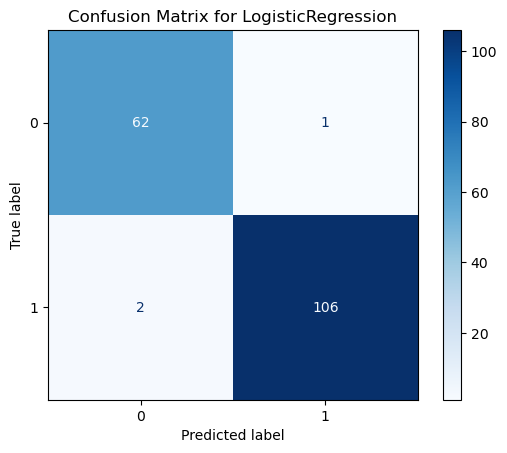

Decision Trees: (0.9415204678362573, 0.9711538461538461, 0.9351851851851852, 0.9528301886792453, 0.9437830687830687)


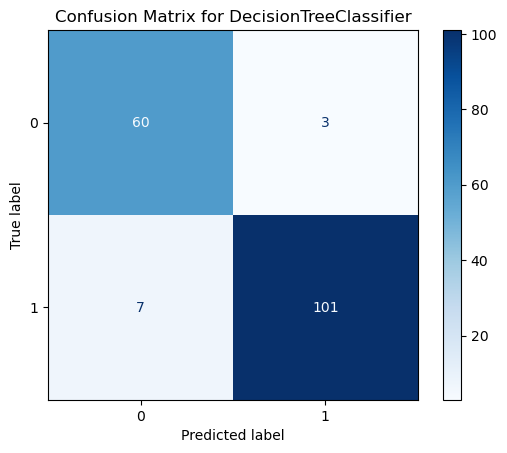

Random Forests: (0.9707602339181286, 0.963963963963964, 0.9907407407407407, 0.9771689497716894, 0.9969135802469136)


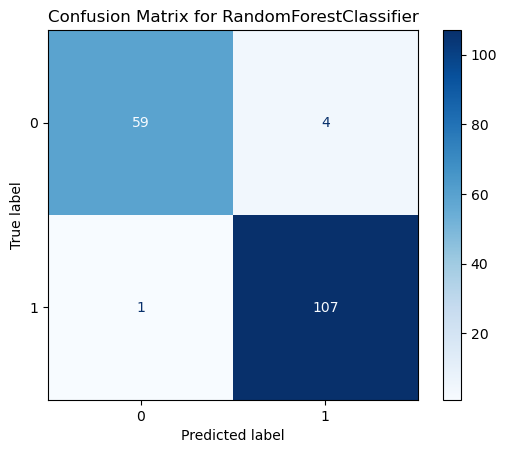

Support Vector Machines (SVM): (0.9766081871345029, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9966196355085244)


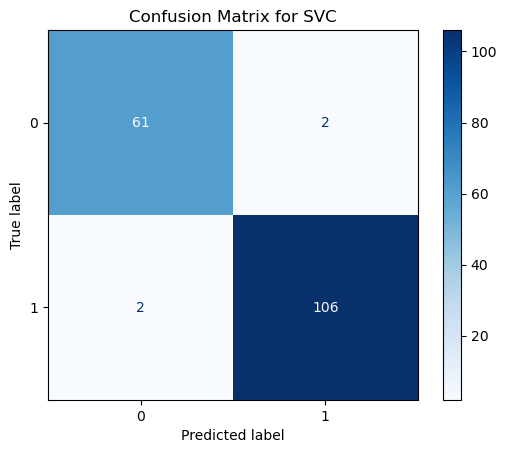

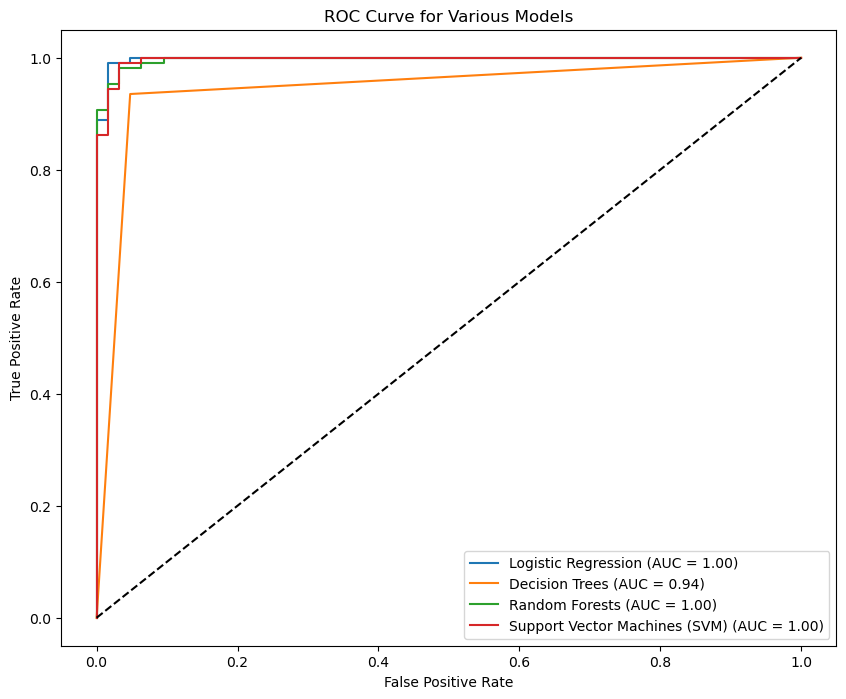

                    ML Algorithm  Accuracy  Precision    Recall  F1 Score  \
0            Logistic Regression  0.982456   0.990654  0.981481  0.986047   
1                 Decision Trees  0.941520   0.971154  0.935185  0.952830   
2                 Random Forests  0.970760   0.963964  0.990741  0.977169   
3  Support Vector Machines (SVM)  0.976608   0.981481  0.981481  0.981481   

   AUC-ROC Score  
0       0.997942  
1       0.943783  
2       0.996914  
3       0.996620  


ML Algorithm,Accuracy,Precision,Recall,F1 Score,AUC-ROC Score
Logistic Regression,0.982456,0.990654,0.981481,0.986047,0.997942
Decision Trees,0.941520,0.971154,0.935185,0.952830,0.943783
Random Forests,0.970760,0.963964,0.990741,0.977169,0.996914
Support Vector Machines (SVM),0.976608,0.981481,0.981481,0.981481,0.996620


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)

# Load and prepare data
data = load_breast_cancer(as_frame=True)
df = data.frame
X = df.drop(columns=['target'])
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train model and evaluate metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    return accuracy, precision, recall, f1, roc_auc, y_proba

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.show()

# Function to plot combined ROC curve
def plot_combined_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Various Models')
    plt.legend(loc='lower right')
    plt.show()

# Train and evaluate each model

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg_metrics = evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)
print("Logistic Regression:", log_reg_metrics[:5])
plot_confusion_matrix(log_reg, X_test_scaled, y_test)

# Decision Trees
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree_metrics = evaluate_model(dec_tree, X_train_scaled, X_test_scaled, y_train, y_test)
print("Decision Trees:", dec_tree_metrics[:5])
plot_confusion_matrix(dec_tree, X_test_scaled, y_test)

# Random Forests
rand_forest = RandomForestClassifier(random_state=42)
rand_forest_metrics = evaluate_model(rand_forest, X_train_scaled, X_test_scaled, y_train, y_test)
print("Random Forests:", rand_forest_metrics[:5])
plot_confusion_matrix(rand_forest, X_test_scaled, y_test)

# Support Vector Machines (SVM)
svm = SVC(probability=True, random_state=42)
svm_metrics = evaluate_model(svm, X_train_scaled, X_test_scaled, y_train, y_test)
print("Support Vector Machines (SVM):", svm_metrics[:5])
plot_confusion_matrix(svm, X_test_scaled, y_test)

# Plot combined ROC curve
models = {
    'Logistic Regression': log_reg,
    'Decision Trees': dec_tree,
    'Random Forests': rand_forest,
    'Support Vector Machines (SVM)': svm
}
plot_combined_roc_curve(models, X_test_scaled, y_test)

# Results Table
results = {
    'ML Algorithm': [
        'Logistic Regression', 'Decision Trees', 
        'Random Forests', 'Support Vector Machines (SVM)'
    ],
    'Accuracy': [
        log_reg_metrics[0], dec_tree_metrics[0], 
        rand_forest_metrics[0], svm_metrics[0]
    ],
    'Precision': [
        log_reg_metrics[1], dec_tree_metrics[1], 
        rand_forest_metrics[1], svm_metrics[1]
    ],
    'Recall': [
        log_reg_metrics[2], dec_tree_metrics[2], 
        rand_forest_metrics[2], svm_metrics[2]
    ],
    'F1 Score': [
        log_reg_metrics[3], dec_tree_metrics[3], 
        rand_forest_metrics[3], svm_metrics[3]
    ],
    'AUC-ROC Score': [
        log_reg_metrics[4], dec_tree_metrics[4], 
        rand_forest_metrics[4], svm_metrics[4]
    ]
}

# Creating the DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
print(df_results)

# Convert DataFrame to HTML table
html_table = df_results.to_html(index=False)

# Save HTML table to a file (optional)
with open("results_table.html", "w") as file:
    file.write(html_table)

# Displaying the HTML table for visualization
from IPython.display import display, HTML
display(HTML(html_table))


Logistic Regression: (0.9824561403508771, 0.9906542056074766, 0.9814814814814815, 0.986046511627907, 0.9979423868312757)


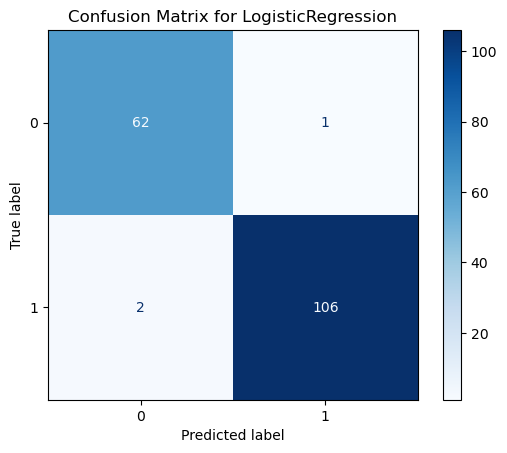

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


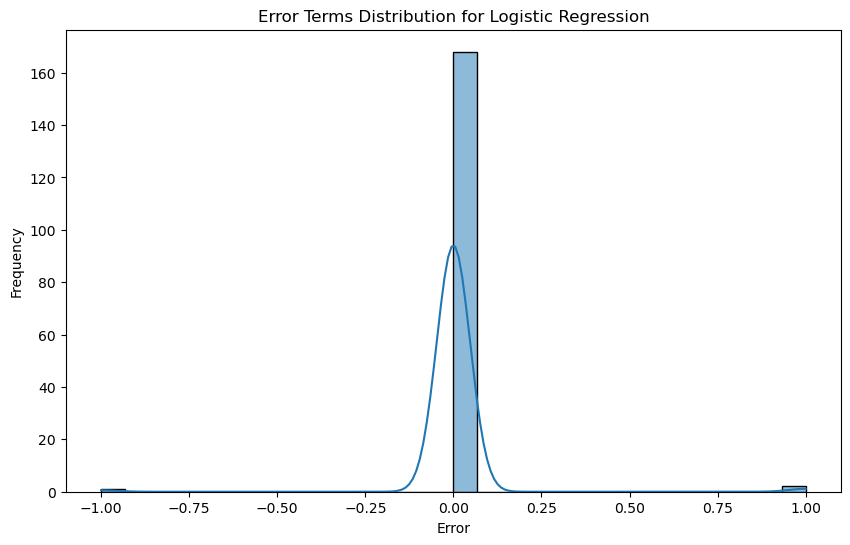

Decision Trees: (0.9415204678362573, 0.9711538461538461, 0.9351851851851852, 0.9528301886792453, 0.9437830687830687)


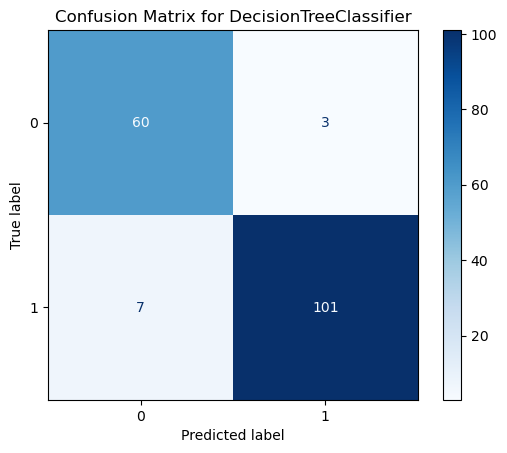

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


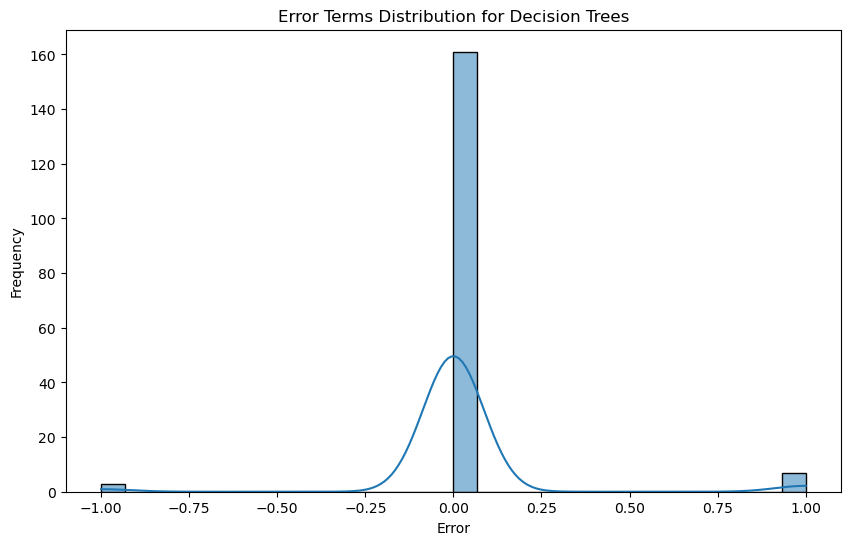

Random Forests: (0.9707602339181286, 0.963963963963964, 0.9907407407407407, 0.9771689497716894, 0.9969135802469136)


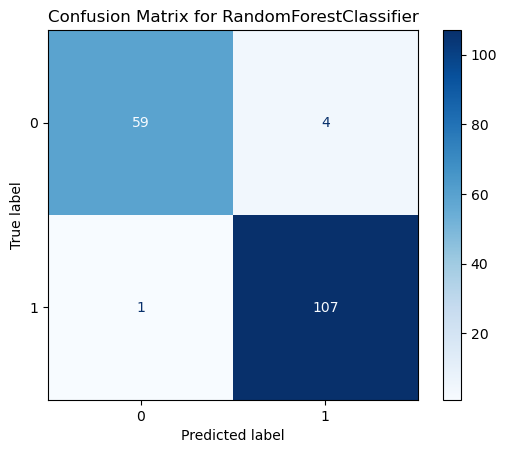

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


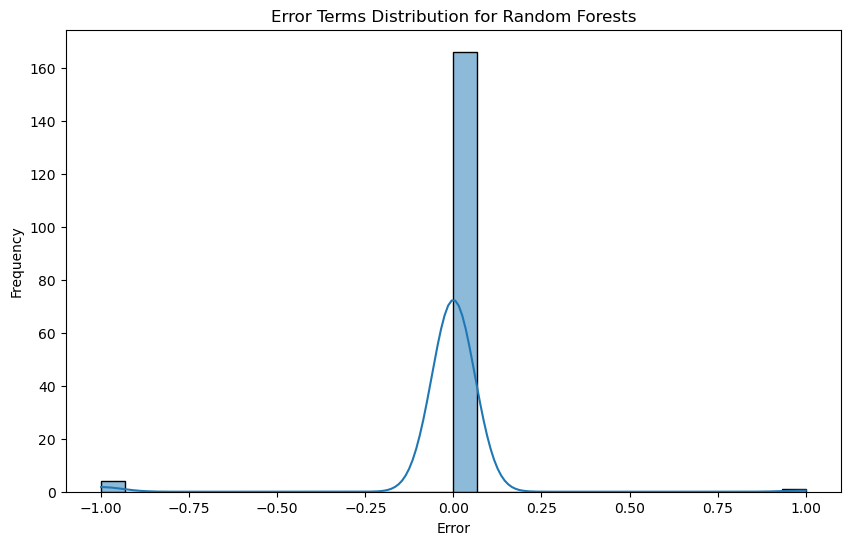

Support Vector Machines (SVM): (0.9766081871345029, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9966196355085244)


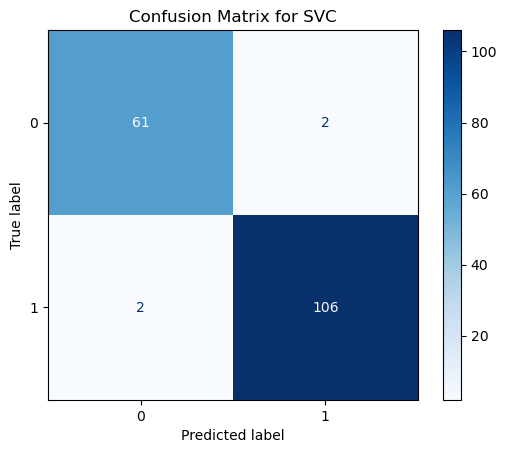

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


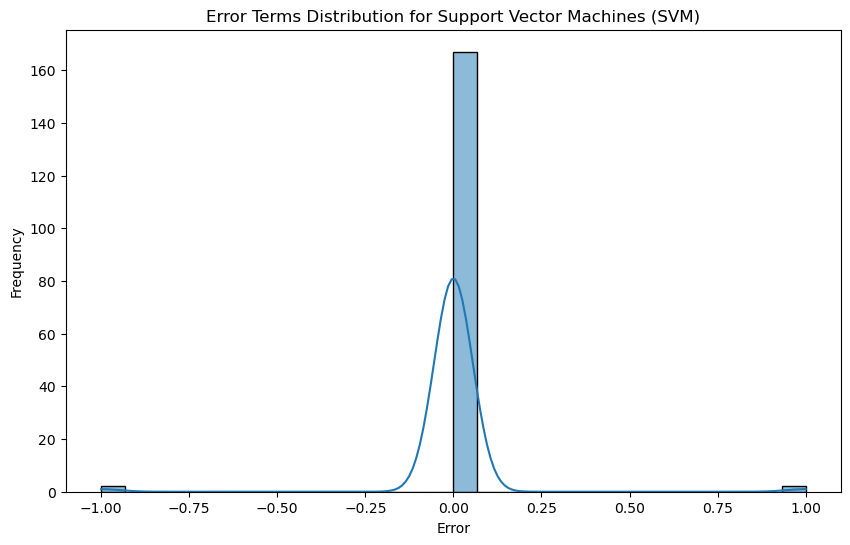

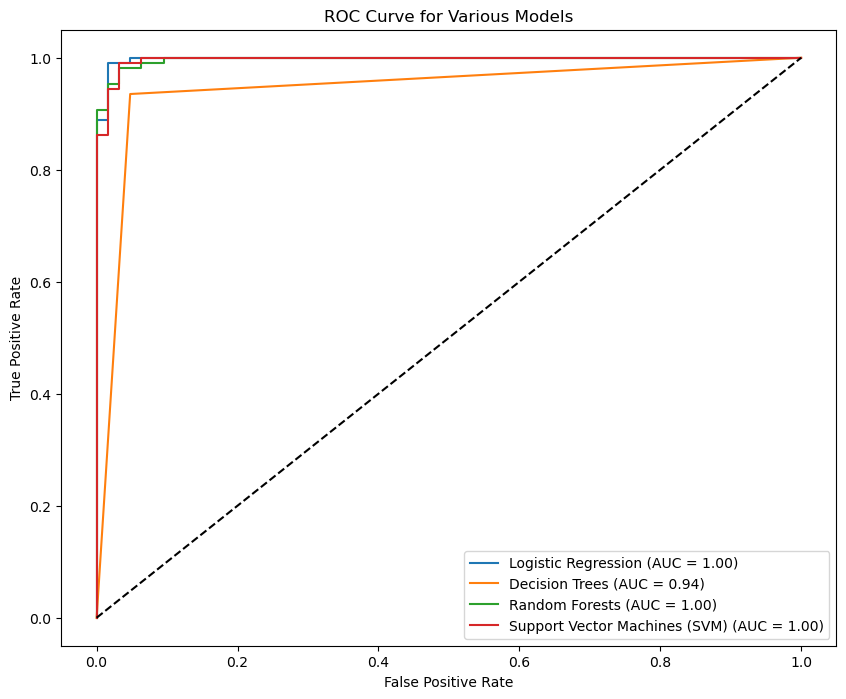

                    ML Algorithm  Accuracy  Precision    Recall  F1 Score  \
0            Logistic Regression  0.982456   0.990654  0.981481  0.986047   
1                 Decision Trees  0.941520   0.971154  0.935185  0.952830   
2                 Random Forests  0.970760   0.963964  0.990741  0.977169   
3  Support Vector Machines (SVM)  0.976608   0.981481  0.981481  0.981481   

   AUC-ROC Score  
0       0.997942  
1       0.943783  
2       0.996914  
3       0.996620  


ML Algorithm,Accuracy,Precision,Recall,F1 Score,AUC-ROC Score
Logistic Regression,0.982456,0.990654,0.981481,0.986047,0.997942
Decision Trees,0.941520,0.971154,0.935185,0.952830,0.943783
Random Forests,0.970760,0.963964,0.990741,0.977169,0.996914
Support Vector Machines (SVM),0.976608,0.981481,0.981481,0.981481,0.996620


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)

# Load and prepare data
data = load_breast_cancer(as_frame=True)
df = data.frame
X = df.drop(columns=['target'])
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train model and evaluate metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    error_terms = y_test - y_pred
    
    return accuracy, precision, recall, f1, roc_auc, y_proba, error_terms

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.show()

# Function to plot combined ROC curve
def plot_combined_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Various Models')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot error terms
def plot_error_terms(model_name, error_terms):
    plt.figure(figsize=(10, 6))
    sns.histplot(error_terms, kde=True, bins=30)
    plt.title(f'Error Terms Distribution for {model_name}')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.show()

# Train and evaluate each model

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg_metrics = evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)
print("Logistic Regression:", log_reg_metrics[:5])
plot_confusion_matrix(log_reg, X_test_scaled, y_test)
plot_error_terms("Logistic Regression", log_reg_metrics[6])

# Decision Trees
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree_metrics = evaluate_model(dec_tree, X_train_scaled, X_test_scaled, y_train, y_test)
print("Decision Trees:", dec_tree_metrics[:5])
plot_confusion_matrix(dec_tree, X_test_scaled, y_test)
plot_error_terms("Decision Trees", dec_tree_metrics[6])

# Random Forests
rand_forest = RandomForestClassifier(random_state=42)
rand_forest_metrics = evaluate_model(rand_forest, X_train_scaled, X_test_scaled, y_train, y_test)
print("Random Forests:", rand_forest_metrics[:5])
plot_confusion_matrix(rand_forest, X_test_scaled, y_test)
plot_error_terms("Random Forests", rand_forest_metrics[6])

# Support Vector Machines (SVM)
svm = SVC(probability=True, random_state=42)
svm_metrics = evaluate_model(svm, X_train_scaled, X_test_scaled, y_train, y_test)
print("Support Vector Machines (SVM):", svm_metrics[:5])
plot_confusion_matrix(svm, X_test_scaled, y_test)
plot_error_terms("Support Vector Machines (SVM)", svm_metrics[6])

# Plot combined ROC curve
models = {
    'Logistic Regression': log_reg,
    'Decision Trees': dec_tree,
    'Random Forests': rand_forest,
    'Support Vector Machines (SVM)': svm
}
plot_combined_roc_curve(models, X_test_scaled, y_test)

# Results Table
results = {
    'ML Algorithm': [
        'Logistic Regression', 'Decision Trees', 
        'Random Forests', 'Support Vector Machines (SVM)'
    ],
    'Accuracy': [
        log_reg_metrics[0], dec_tree_metrics[0], 
        rand_forest_metrics[0], svm_metrics[0]
    ],
    'Precision': [
        log_reg_metrics[1], dec_tree_metrics[1], 
        rand_forest_metrics[1], svm_metrics[1]
    ],
    'Recall': [
        log_reg_metrics[2], dec_tree_metrics[2], 
        rand_forest_metrics[2], svm_metrics[2]
    ],
    'F1 Score': [
        log_reg_metrics[3], dec_tree_metrics[3], 
        rand_forest_metrics[3], svm_metrics[3]
    ],
    'AUC-ROC Score': [
        log_reg_metrics[4], dec_tree_metrics[4], 
        rand_forest_metrics[4], svm_metrics[4]
    ]
}

# Creating the DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
print(df_results)

# Convert DataFrame to HTML table
html_table = df_results.to_html(index=False)

# Save HTML table to a file (optional)
with open("results_table.html", "w") as file:
    file.write(html_table)

# Displaying the HTML table for visualization
from IPython.display import display, HTML
display(HTML(html_table))


Logistic Regression: (0.9824561403508771, 0.9906542056074766, 0.9814814814814815, 0.986046511627907, 0.9979423868312757)


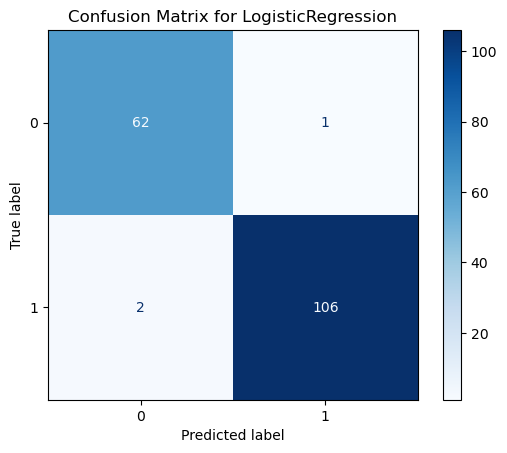

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


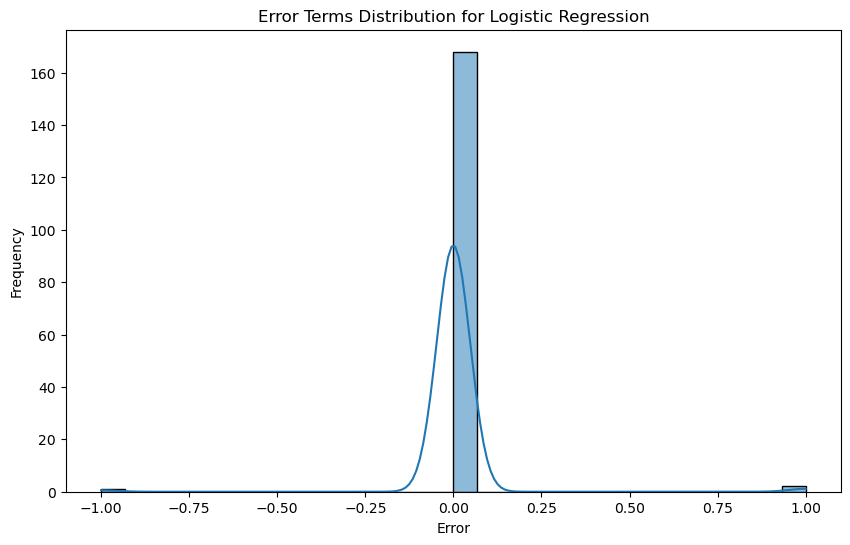

Decision Trees: (0.9415204678362573, 0.9711538461538461, 0.9351851851851852, 0.9528301886792453, 0.9437830687830687)


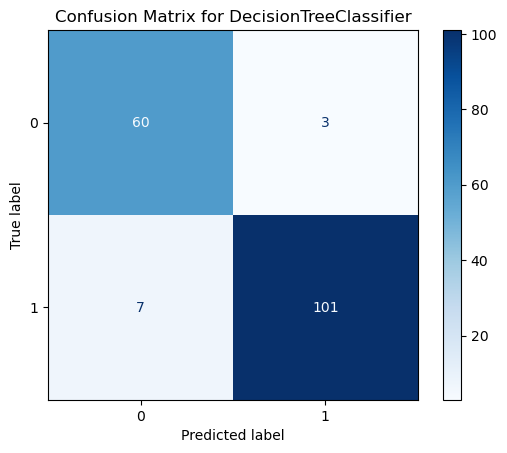

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


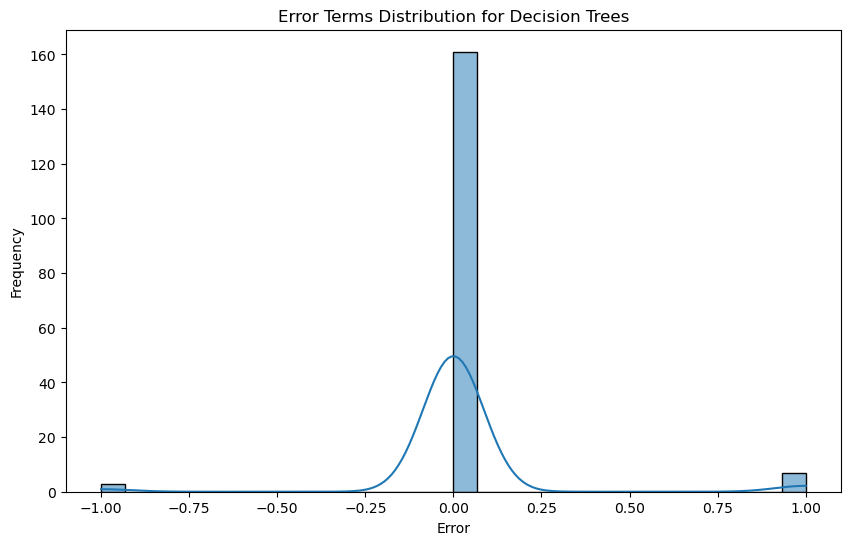

Random Forests: (0.9707602339181286, 0.963963963963964, 0.9907407407407407, 0.9771689497716894, 0.9969135802469136)


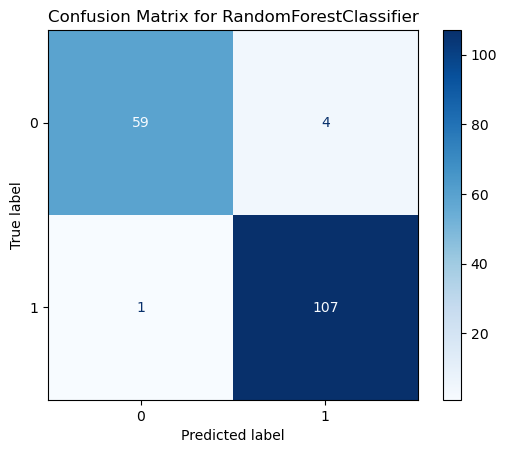

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


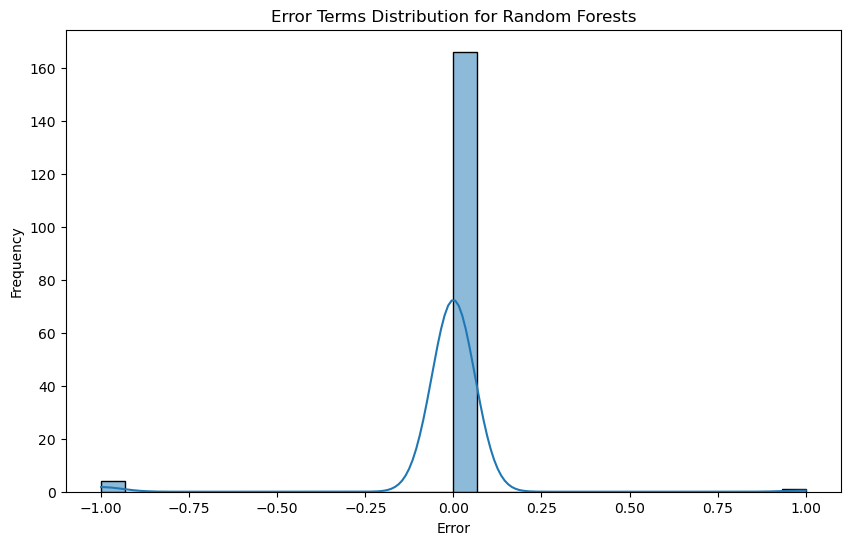

SVM Linear: (0.9766081871345029, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9964726631393298)
SVM Poly: (0.8947368421052632, 0.8571428571428571, 1.0, 0.923076923076923, 0.9972075249853027)
SVM RBF: (0.9766081871345029, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9966196355085244)


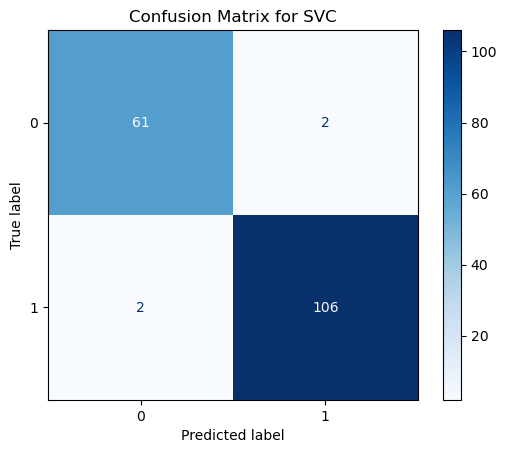

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


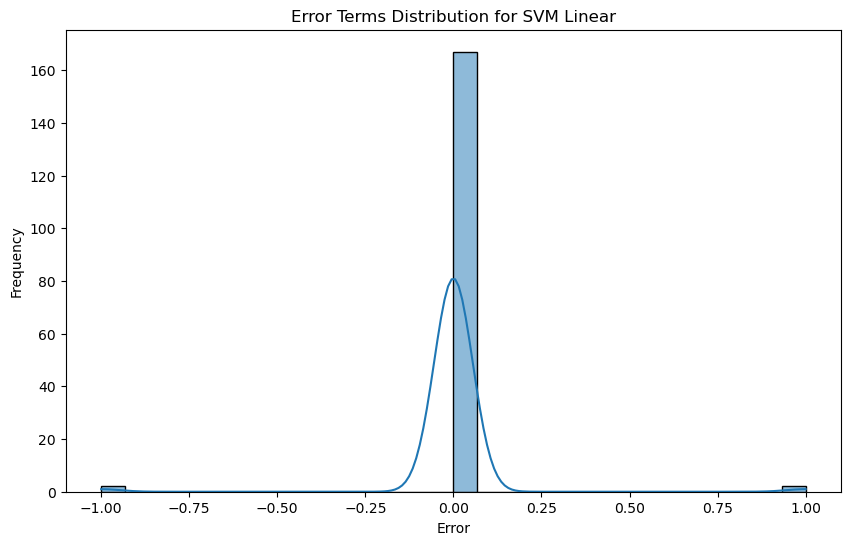

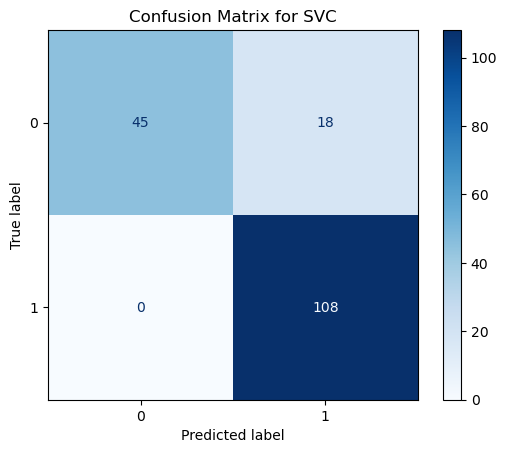

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


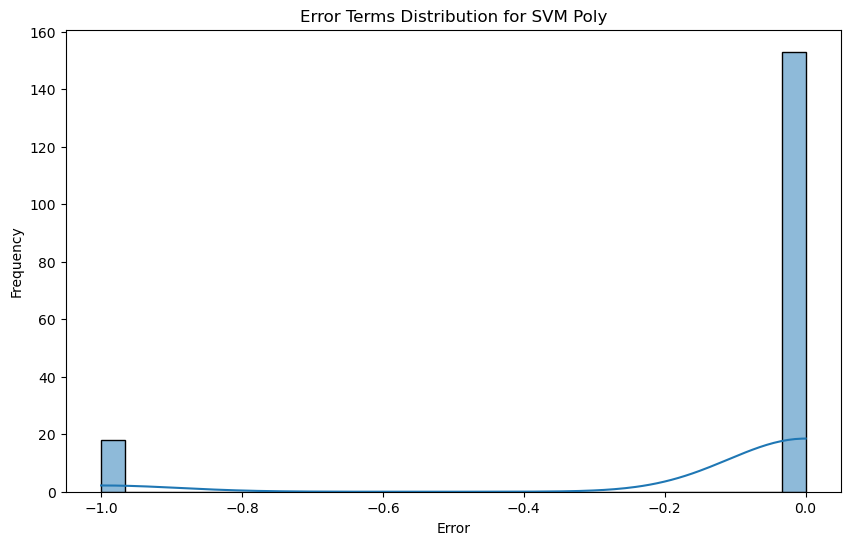

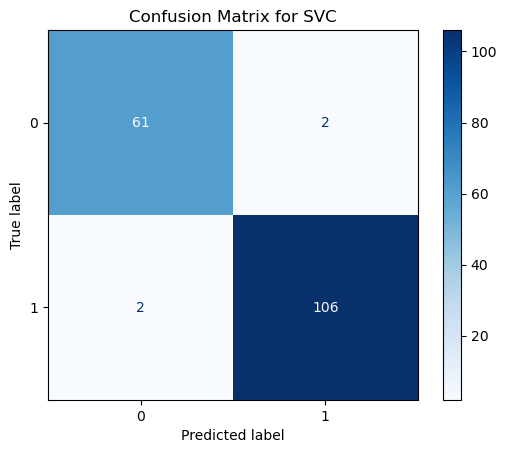

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


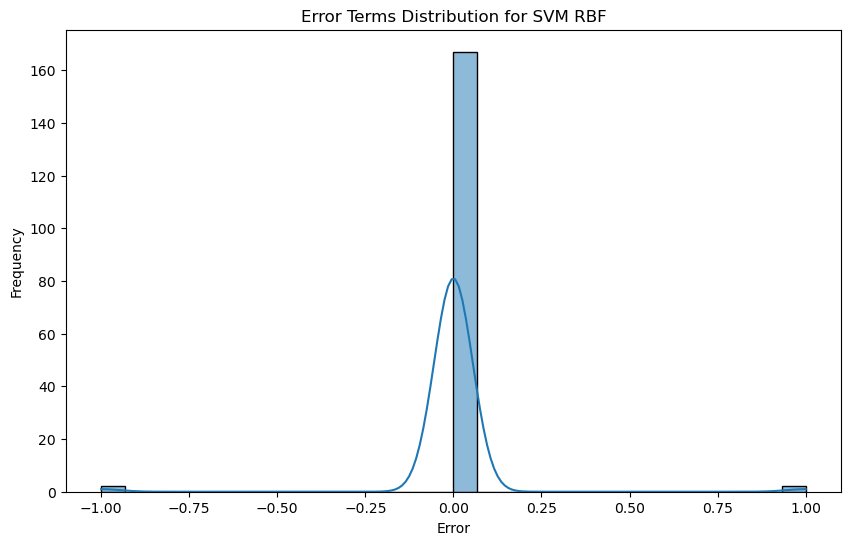

Linear Regression: (0.9532163742690059, 0.9464285714285714, 0.9814814814814815, 0.9636363636363636, 0.9942680776014109)


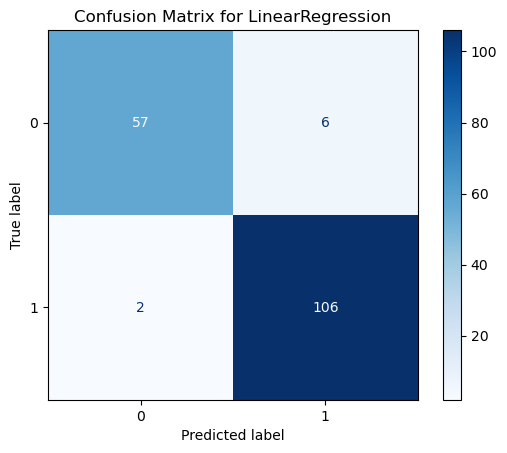

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


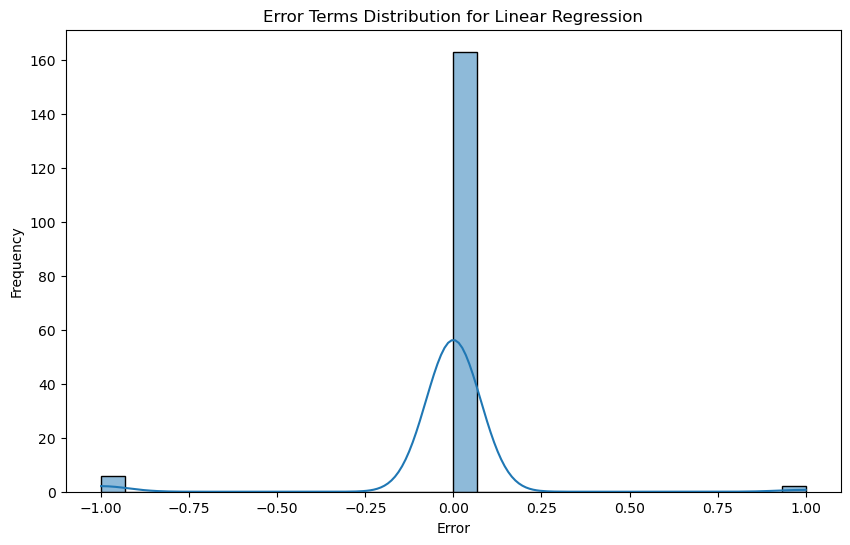

C:\Users\bhuma\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging: (0.9473684210526315, 0.9626168224299065, 0.9537037037037037, 0.958139534883721, 0.9832451499118166)


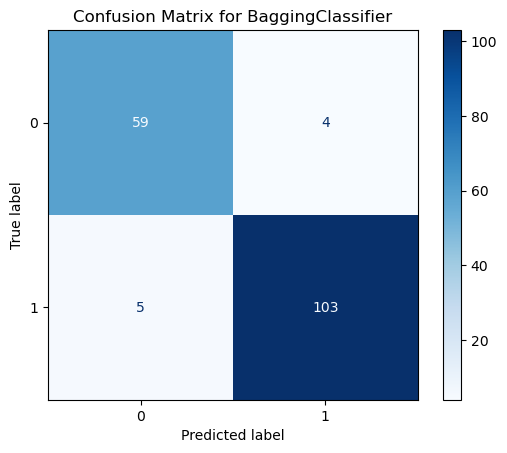

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


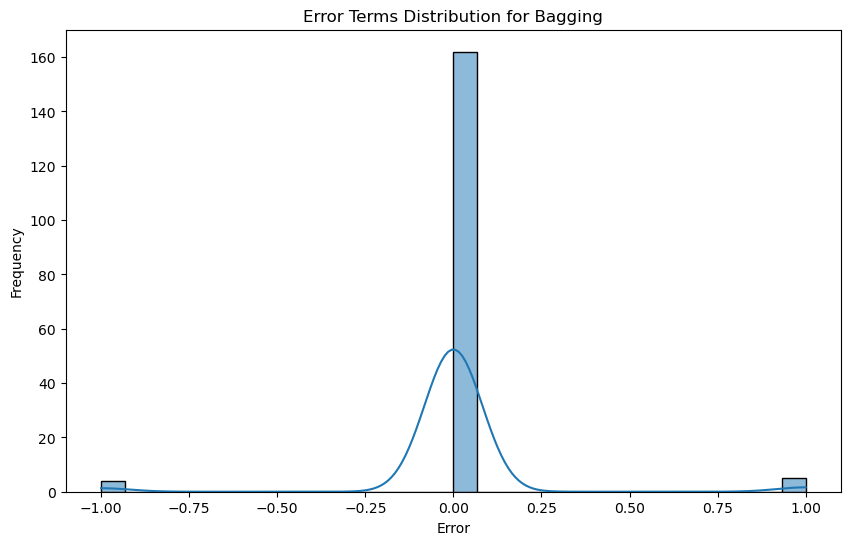

AdaBoost: (0.9766081871345029, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9961787184009406)


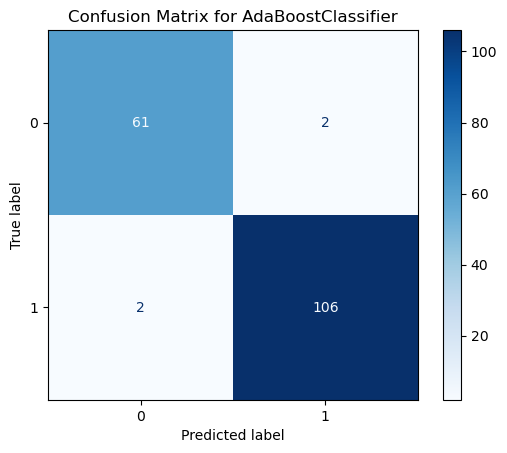

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


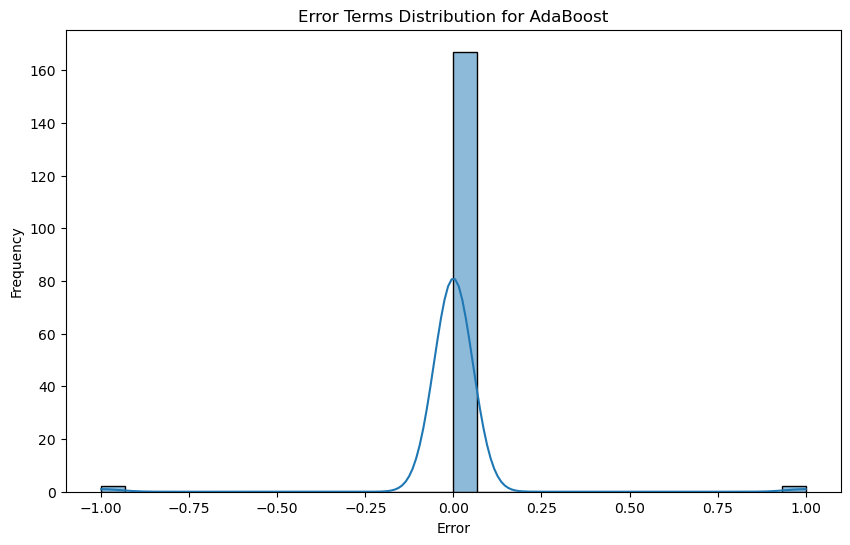

Gradient Boosting: (0.9590643274853801, 0.963302752293578, 0.9722222222222222, 0.9677419354838711, 0.9951499118165785)


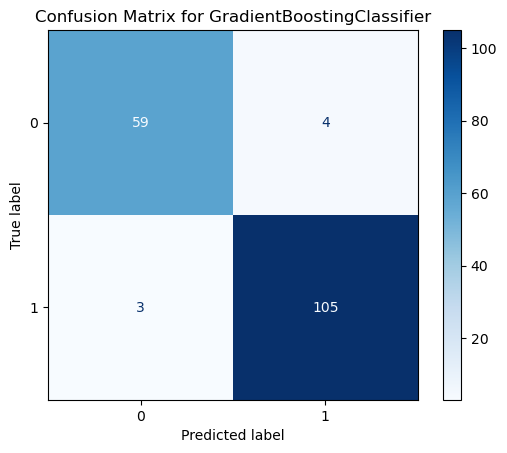

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


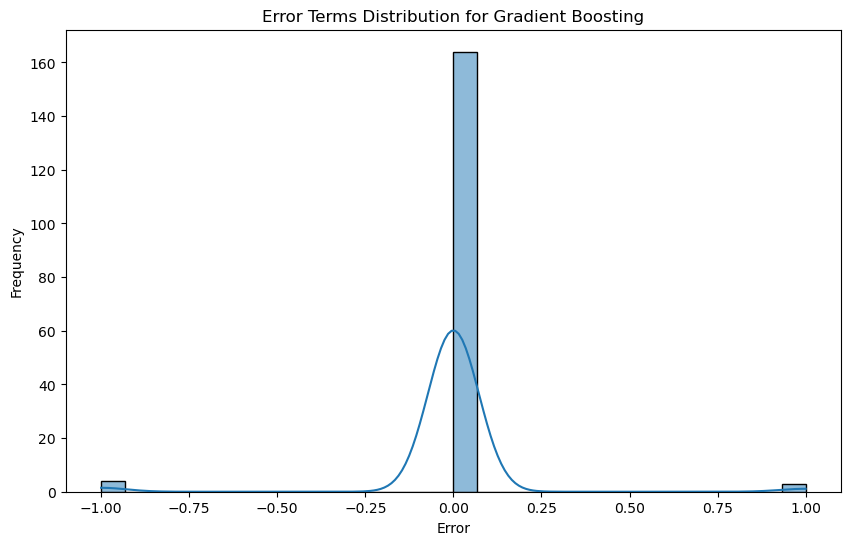

XGBoost: (0.9707602339181286, 0.9813084112149533, 0.9722222222222222, 0.9767441860465117, 0.9944150499706055)


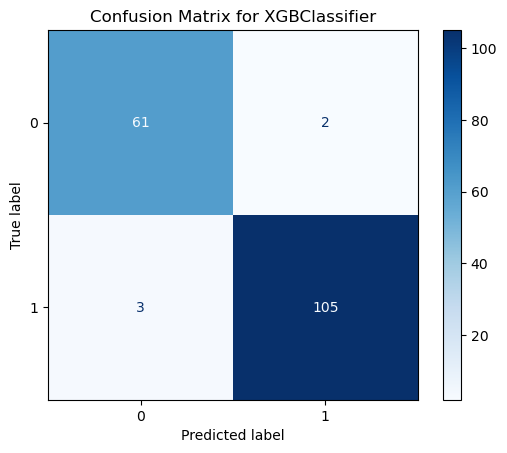

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


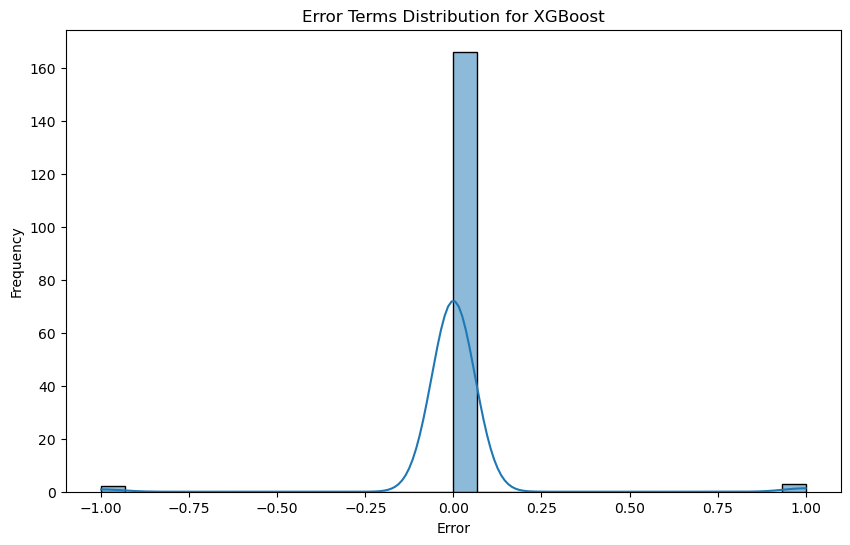

Stacking: (0.9883040935672515, 0.9907407407407407, 0.9907407407407407, 0.9907407407407407, 0.9972075249853029)


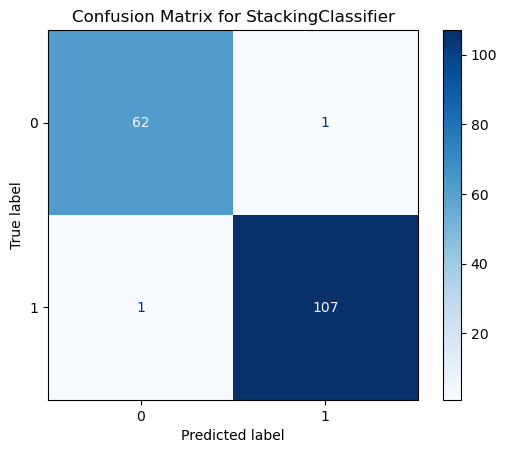

C:\Users\bhuma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


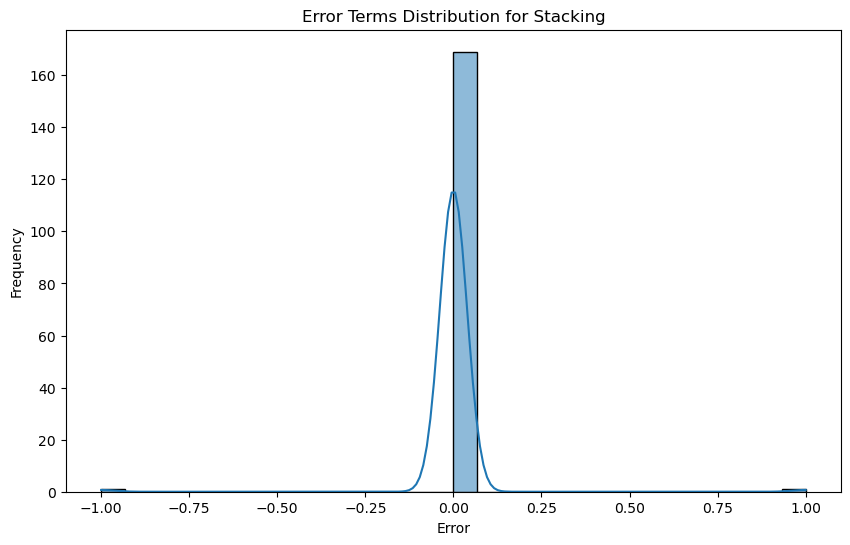

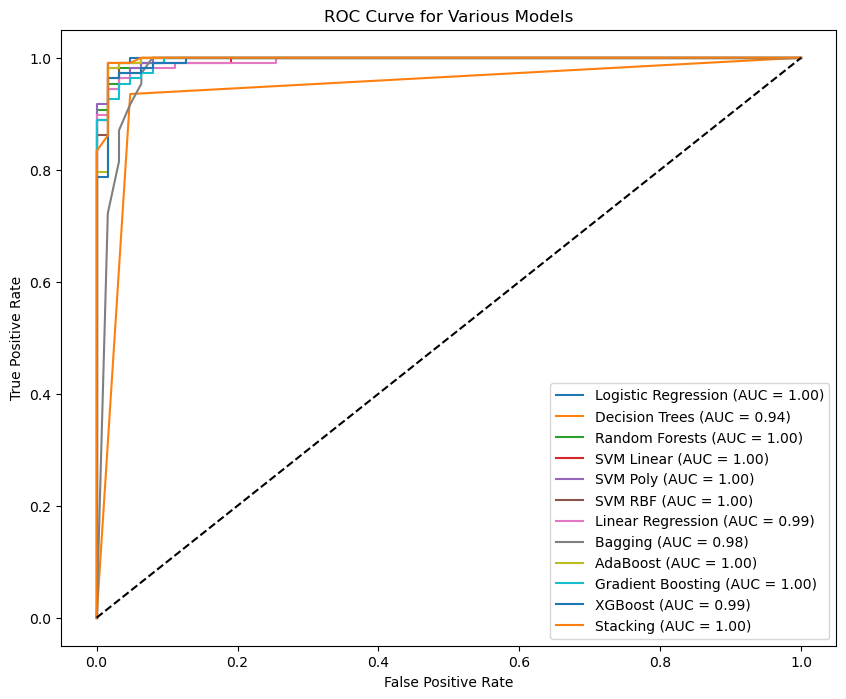

           ML Algorithm  Accuracy  Precision    Recall  F1 Score   ROC AUC
0   Logistic Regression  0.982456   0.990654  0.981481  0.986047  0.997942
1        Decision Trees  0.941520   0.971154  0.935185  0.952830  0.943783
2        Random Forests  0.970760   0.963964  0.990741  0.977169  0.996914
3            SVM Linear  0.976608   0.981481  0.981481  0.981481  0.996473
4              SVM Poly  0.894737   0.857143  1.000000  0.923077  0.997208
5               SVM RBF  0.976608   0.981481  0.981481  0.981481  0.996620
6     Linear Regression  0.953216   0.946429  0.981481  0.963636  0.994268
7               Bagging  0.947368   0.962617  0.953704  0.958140  0.983245
8              AdaBoost  0.976608   0.981481  0.981481  0.981481  0.996179
9     Gradient Boosting  0.959064   0.963303  0.972222  0.967742  0.995150
10              XGBoost  0.970760   0.981308  0.972222  0.976744  0.994415
11             Stacking  0.988304   0.990741  0.990741  0.990741  0.997208


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, 
    GradientBoostingClassifier, StackingClassifier
)
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
import xgboost as xgb

# Load and prepare data
data = load_breast_cancer(as_frame=True)
df = data.frame
X = df.drop(columns=['target'])
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train model and evaluate metrics
def evaluate_model(model, X_train, X_test, y_train, y_test, threshold=0.5):
    model.fit(X_train, y_train)
    if isinstance(model, LinearRegression):
        y_proba = model.predict(X_test)
        y_pred = (y_proba >= threshold).astype(int)
    else:
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    error_terms = y_test - y_pred
    
    return accuracy, precision, recall, f1, roc_auc, y_proba, error_terms

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, threshold=0.5):
    if isinstance(model, LinearRegression):
        y_proba = model.predict(X_test)
        y_pred = (y_proba >= threshold).astype(int)
    else:
        y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.show()

# Function to plot combined ROC curve
def plot_combined_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        if isinstance(model, LinearRegression):
            y_proba = model.predict(X_test)
        else:
            y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Various Models')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot error terms
def plot_error_terms(model_name, error_terms):
    plt.figure(figsize=(10, 6))
    sns.histplot(error_terms, kde=True, bins=30)
    plt.title(f'Error Terms Distribution for {model_name}')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.show()

# Train and evaluate each model

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg_metrics = evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)
print("Logistic Regression:", log_reg_metrics[:5])
plot_confusion_matrix(log_reg, X_test_scaled, y_test)
plot_error_terms("Logistic Regression", log_reg_metrics[6])

# Decision Trees
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree_metrics = evaluate_model(dec_tree, X_train_scaled, X_test_scaled, y_train, y_test)
print("Decision Trees:", dec_tree_metrics[:5])
plot_confusion_matrix(dec_tree, X_test_scaled, y_test)
plot_error_terms("Decision Trees", dec_tree_metrics[6])

# Random Forests
rand_forest = RandomForestClassifier(random_state=42)
rand_forest_metrics = evaluate_model(rand_forest, X_train_scaled, X_test_scaled, y_train, y_test)
print("Random Forests:", rand_forest_metrics[:5])
plot_confusion_matrix(rand_forest, X_test_scaled, y_test)
plot_error_terms("Random Forests", rand_forest_metrics[6])

# Support Vector Machines (SVM) with different kernels
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)

svm_linear_metrics = evaluate_model(svm_linear, X_train_scaled, X_test_scaled, y_train, y_test)
svm_poly_metrics = evaluate_model(svm_poly, X_train_scaled, X_test_scaled, y_train, y_test)
svm_rbf_metrics = evaluate_model(svm_rbf, X_train_scaled, X_test_scaled, y_train, y_test)

print("SVM Linear:", svm_linear_metrics[:5])
print("SVM Poly:", svm_poly_metrics[:5])
print("SVM RBF:", svm_rbf_metrics[:5])

plot_confusion_matrix(svm_linear, X_test_scaled, y_test)
plot_error_terms("SVM Linear", svm_linear_metrics[6])

plot_confusion_matrix(svm_poly, X_test_scaled, y_test)
plot_error_terms("SVM Poly", svm_poly_metrics[6])

plot_confusion_matrix(svm_rbf, X_test_scaled, y_test)
plot_error_terms("SVM RBF", svm_rbf_metrics[6])

# Linear Regression (added for comparison)
lin_reg = LinearRegression()
lin_reg_metrics = evaluate_model(lin_reg, X_train_scaled, X_test_scaled, y_train, y_test)
print("Linear Regression:", lin_reg_metrics[:5])
plot_confusion_matrix(lin_reg, X_test_scaled, y_test)
plot_error_terms("Linear Regression", lin_reg_metrics[6])

# Bagging
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)
bagging_metrics = evaluate_model(bagging, X_train_scaled, X_test_scaled, y_train, y_test)
print("Bagging:", bagging_metrics[:5])
plot_confusion_matrix(bagging, X_test_scaled, y_test)
plot_error_terms("Bagging", bagging_metrics[6])

# AdaBoost
ada_boost = AdaBoostClassifier(random_state=42)
ada_boost_metrics = evaluate_model(ada_boost, X_train_scaled, X_test_scaled, y_train, y_test)
print("AdaBoost:", ada_boost_metrics[:5])
plot_confusion_matrix(ada_boost, X_test_scaled, y_test)
plot_error_terms("AdaBoost", ada_boost_metrics[6])

# Gradient Boosting
grad_boost = GradientBoostingClassifier(random_state=42)
grad_boost_metrics = evaluate_model(grad_boost, X_train_scaled, X_test_scaled, y_train, y_test)
print("Gradient Boosting:", grad_boost_metrics[:5])
plot_confusion_matrix(grad_boost, X_test_scaled, y_test)
plot_error_terms("Gradient Boosting", grad_boost_metrics[6])

# XGBoost
xg_boost = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xg_boost_metrics = evaluate_model(xg_boost, X_train_scaled, X_test_scaled, y_train, y_test)
print("XGBoost:", xg_boost_metrics[:5])
plot_confusion_matrix(xg_boost, X_test_scaled, y_test)
plot_error_terms("XGBoost", xg_boost_metrics[6])

# Stacking
estimators = [
    ('log_reg', LogisticRegression(max_iter=10000, random_state=42)),
    ('dec_tree', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]
stacking = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42))
stacking_metrics = evaluate_model(stacking, X_train_scaled, X_test_scaled, y_train, y_test)
print("Stacking:", stacking_metrics[:5])
plot_confusion_matrix(stacking, X_test_scaled, y_test)
plot_error_terms("Stacking", stacking_metrics[6])

# Plot combined ROC curve
models = {
    'Logistic Regression': log_reg,
    'Decision Trees': dec_tree,
    'Random Forests': rand_forest,
    'SVM Linear': svm_linear,
    'SVM Poly': svm_poly,
    'SVM RBF': svm_rbf,
    'Linear Regression': lin_reg,
    'Bagging': bagging,
    'AdaBoost': ada_boost,
    'Gradient Boosting': grad_boost,
    'XGBoost': xg_boost,
    'Stacking': stacking
}
plot_combined_roc_curve(models, X_test_scaled, y_test)

# Results Table
results = {
    'ML Algorithm': [
        'Logistic Regression', 'Decision Trees', 'Random Forests', 'SVM Linear', 
        'SVM Poly', 'SVM RBF', 'Linear Regression', 'Bagging', 'AdaBoost', 
        'Gradient Boosting', 'XGBoost', 'Stacking'
    ],
    'Accuracy': [
        log_reg_metrics[0], dec_tree_metrics[0], rand_forest_metrics[0], svm_linear_metrics[0], 
        svm_poly_metrics[0], svm_rbf_metrics[0], lin_reg_metrics[0], bagging_metrics[0], 
        ada_boost_metrics[0], grad_boost_metrics[0], xg_boost_metrics[0], stacking_metrics[0]
    ],
    'Precision': [
        log_reg_metrics[1], dec_tree_metrics[1], rand_forest_metrics[1], svm_linear_metrics[1], 
        svm_poly_metrics[1], svm_rbf_metrics[1], lin_reg_metrics[1], bagging_metrics[1], 
        ada_boost_metrics[1], grad_boost_metrics[1], xg_boost_metrics[1], stacking_metrics[1]
    ],
    'Recall': [
        log_reg_metrics[2], dec_tree_metrics[2], rand_forest_metrics[2], svm_linear_metrics[2], 
        svm_poly_metrics[2], svm_rbf_metrics[2], lin_reg_metrics[2], bagging_metrics[2], 
        ada_boost_metrics[2], grad_boost_metrics[2], xg_boost_metrics[2], stacking_metrics[2]
    ],
    'F1 Score': [
        log_reg_metrics[3], dec_tree_metrics[3], rand_forest_metrics[3], svm_linear_metrics[3], 
        svm_poly_metrics[3], svm_rbf_metrics[3], lin_reg_metrics[3], bagging_metrics[3], 
        ada_boost_metrics[3], grad_boost_metrics[3], xg_boost_metrics[3], stacking_metrics[3]
    ],
    'ROC AUC': [
        log_reg_metrics[4], dec_tree_metrics[4], rand_forest_metrics[4], svm_linear_metrics[4], 
        svm_poly_metrics[4], svm_rbf_metrics[4], lin_reg_metrics[4], bagging_metrics[4], 
        ada_boost_metrics[4], grad_boost_metrics[4], xg_boost_metrics[4], stacking_metrics[4]
    ]
}

results_df = pd.DataFrame(results)
print(results_df)
